In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy
from tqdm import tqdm
import pickle

# import matplotlib.animation as animation
# from IPython.display import Video

# import h3
# from h3.unstable import vect
import sys
sys.path.append('../functions')
import hexbin_functions as hexfunc

/nethome/6525954/.conda/envs/nemo-ensemble/lib/python3.12/site-packages/h3/unstable/__init__.py:4: UserWarning: Modules under `h3.unstable` are experimental, and may change at any time.
  warnings.warn(


In [3]:
location = 'Cape_Hatteras'
member = 50 # memeber
delta_r = 0.1# Standard deviation od initial dispersion

file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/{location}/spatial/dr_{delta_r*100:03.0f}/{location}_dr{delta_r*100:03.0f}_m{member:03d}.zarr"
pset = xr.open_zarr(file_path)

In [4]:
pset

<xarray.Dataset> Size: 35MB
Dimensions:     (trajectory: 1001, obs: 730)
Coordinates:
  * obs         (obs) int32 3kB 0 1 2 3 4 5 6 7 ... 723 724 725 726 727 728 729
  * trajectory  (trajectory) int64 8kB 0 1 2 3 4 5 ... 995 996 997 998 999 1000
Data variables:
    hexbin_id   (trajectory, obs) float32 3MB dask.array<chunksize=(1001, 1), meta=np.ndarray>
    lat         (trajectory, obs) float64 6MB dask.array<chunksize=(1001, 1), meta=np.ndarray>
    lon         (trajectory, obs) float64 6MB dask.array<chunksize=(1001, 1), meta=np.ndarray>
    time        (trajectory, obs) datetime64[ns] 6MB dask.array<chunksize=(1001, 1), meta=np.ndarray>
    u           (trajectory, obs) float32 3MB dask.array<chunksize=(1001, 1), meta=np.ndarray>
    v           (trajectory, obs) float32 3MB dask.array<chunksize=(1001, 1), meta=np.ndarray>
    w           (trajectory, obs) float32 3MB dask.array<chunksize=(1001, 1), meta=np.ndarray>
    z           (trajectory, obs) float64 6MB dask.array<chunksize=(1001, 1), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        EnsembleParticleAdvectionRK4_3DSampleFieldKeepInO...
    parcels_mesh:           spherical
    parcels_version:        3.0.2

In this case the levels represent of the continous release criteria. De cuantas formas puedes reorganizar 7400 particulas?

In [5]:
subgroups = {}

max_gap = 60

timesteps = np.linspace(1, 745, 745, dtype=int)
max_releases = timesteps[0::max_gap].shape[0]

set = np.linspace(0, 100, 100, dtype=int)

for i in [24, 36, 48, 60]: #range(1,max_gap,12):
    set_start = timesteps[0::i][:max_releases]*100
    indexes = []
    
    for j in set_start:
        indexes = indexes + list(j+set)
    
    subgroups[i] = np.array(indexes)
    

In [6]:
subgroups[60].shape

(1300,)

## Build Dataset $\forall$ members

In [6]:
coreset = np.linspace(100, 200, 100, dtype=int)
coreset

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 200])

In [7]:
location = 'Cape_Hatteras'
member = 49 # memeber
delta_r = 0.1 # Standard deviation od initial dispersion

path = file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/{location}/spatial/dr_{delta_r*100:03.0f}/{location}_dr{delta_r*100:03.0f}_m{member:03d}.zarr"
coreset = np.linspace(100, 200, 100, dtype=int)

pset_members = xr.open_zarr(path)
# pset_members = pset_members.isel(trajectory=coreset)


for member in tqdm([1, 2, 47, 48, 49, 50]):
    print(member)
    path = file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/{location}/spatial/dr_{delta_r*100:03.0f}/{location}_dr{delta_r*100:03.0f}_m{member:03d}.zarr"

    pset_members_aux = xr.open_zarr(path)
    # pset_members_aux = pset_members_aux.isel(trajectory=coreset)
    pset_members = xr.concat([pset_members, pset_members_aux], dim='trajectory')
    

  0%|          | 0/6 [00:00<?, ?it/s]

1


 17%|█▋        | 1/6 [00:01<00:06,  1.20s/it]

2


 33%|███▎      | 2/6 [00:06<00:15,  3.80s/it]

47


 50%|█████     | 3/6 [00:07<00:06,  2.33s/it]

48


 83%|████████▎ | 5/6 [00:13<00:02,  2.43s/it]

49
50


100%|██████████| 6/6 [00:13<00:00,  2.25s/it]


In [8]:
pset_members

<xarray.Dataset> Size: 246MB
Dimensions:     (trajectory: 7007, obs: 730)
Coordinates:
  * obs         (obs) int32 3kB 0 1 2 3 4 5 6 7 ... 723 724 725 726 727 728 729
  * trajectory  (trajectory) int64 56kB 0 1 2 3 4 5 ... 995 996 997 998 999 1000
Data variables:
    hexbin_id   (trajectory, obs) float32 20MB dask.array<chunksize=(1001, 1), meta=np.ndarray>
    lat         (trajectory, obs) float64 41MB dask.array<chunksize=(1001, 1), meta=np.ndarray>
    lon         (trajectory, obs) float64 41MB dask.array<chunksize=(1001, 1), meta=np.ndarray>
    time        (trajectory, obs) datetime64[ns] 41MB dask.array<chunksize=(1001, 1), meta=np.ndarray>
    u           (trajectory, obs) float32 20MB dask.array<chunksize=(1001, 1), meta=np.ndarray>
    v           (trajectory, obs) float32 20MB dask.array<chunksize=(1001, 1), meta=np.ndarray>
    w           (trajectory, obs) float32 20MB dask.array<chunksize=(1001, 1), meta=np.ndarray>
    z           (trajectory, obs) float64 41MB dask.array<chunksize=(1001, 1), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        EnsembleParticleAdvectionRK4_3DSampleFieldKeepInO...
    parcels_mesh:           spherical
    parcels_version:        3.0.2

## 4. Build PDFs $\forall$ members

In [37]:
# load the hexbin grid 
with open(f'../data/hexgrid_no_coast_h2.pkl', 'rb') as f:
        hexbin_grid = pickle.load(f)
    
hexbin_grid_h2 = hexfunc.hexGrid(hexbin_grid, h3_res=2)

with open(f'../data/hexgrid_no_coast_h3.pkl', 'rb') as f:
        hexbin_grid = pickle.load(f)
hexbin_grid_h3 = hexfunc.hexGrid(hexbin_grid, h3_res=3)

with open(f'../data/hexgrid_no_coast_h4.pkl', 'rb') as f:
        hexbin_grid = pickle.load(f)
hexbin_grid_h4 = hexfunc.hexGrid(hexbin_grid, h3_res=4)

In [38]:
obs_length = len(pset_members.obs)

probability_h2 = np.zeros((hexbin_grid_h2.n_hex, obs_length))
probability_h3 = np.zeros((hexbin_grid_h3.n_hex, obs_length))
probability_h4 = np.zeros((hexbin_grid_h4.n_hex, obs_length))

lons, lats = pset_members['lon'][:, :].values, pset_members['lat'][:, :].values

for t in tqdm(range(obs_length)):
    probability_h2[:, t] = hexbin_grid_h2.count_2d(lons[:,t], lats[:, t], normalize=True)
    probability_h3[:, t] = hexbin_grid_h3.count_2d(lons[:,t], lats[:, t], normalize=True)
    probability_h4[:, t] = hexbin_grid_h4.count_2d(lons[:,t], lats[:, t], normalize=True)

100%|██████████| 730/730 [05:35<00:00,  2.18it/s]


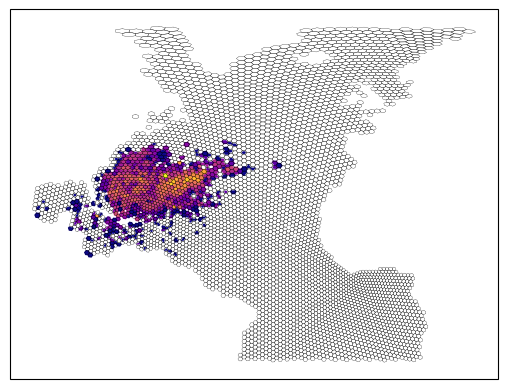

In [39]:
hexbin_grid_h3.pcolorhex(probability_h3[:, 700], cmap='plasma', draw_edges=True)


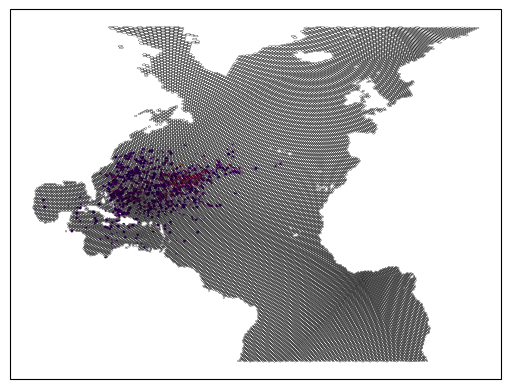

In [43]:
hexbin_grid_h4.pcolorhex(probability_h4[:, 700], cmap='plasma', draw_edges=True)

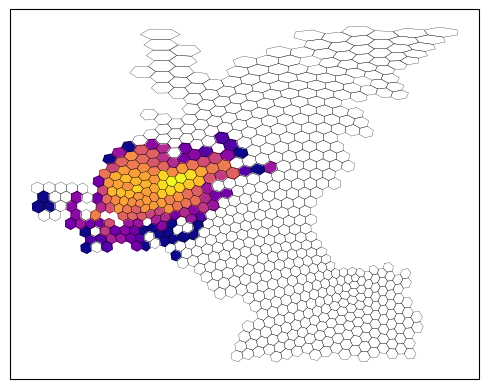

In [41]:
hexbin_grid_h2.pcolorhex(probability_h2[:, 700], cmap='plasma', draw_edges=True)

In [18]:
mask_file = '/storage/shared/oceanparcels/input_data/NEMO_Ensemble/GRID/NATL025-CJMenobs01_byte_mask.nc'
mask = xr.open_dataset(mask_file, decode_times=False)

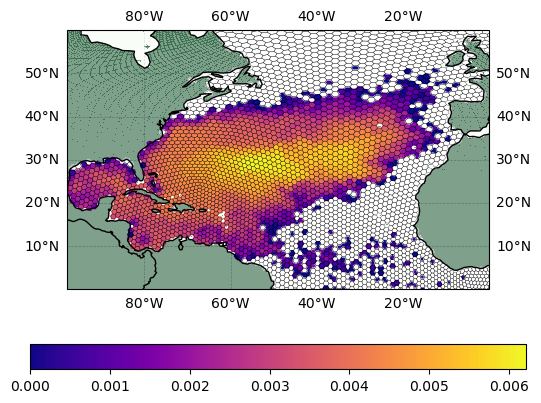

In [31]:
# Plot NA_domain on a map
depth = 0
fig = plt.figure()
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.set_extent([-98, 0, 0, 60], crs=cartopy.crs.PlateCarree())
# ax.coastlines()
ax.gridlines(draw_labels=True, zorder=0, linestyle='--', linewidth=0.5)

ax.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0,depth,:,:], cmap='Greens_r', alpha=0.5)


im = hexbin_grid.pcolorhex(probability[:, 1300], ax=ax, cmap='plasma', draw_edges=True)
# add colorbar
cbar = plt.colorbar(im, ax=ax, orientation='horizontal')

In [20]:
def entropy(Pdf):
    Pdf = Pdf / np.nansum(Pdf)  # Normalize Pdf to sum to 1, ignoring NaNs
    # Replace zeros with a very small number to avoid log(0)
    Pdf_safe = np.where(Pdf > 0, Pdf, np.finfo(float).eps)
    return -np.nansum(Pdf_safe * np.log(Pdf_safe))

def kullback_leibler(P, Q):
    P = P / np.nansum(P)  # Normalize P to sum to 1, ignoring NaNs
    Q = Q / np.nansum(Q)  # Normalize Q to sum to 1, ignoring NaNs
    # Replace zeros in P and Q with a very small number to avoid division by zero and log(0)
    P_safe = np.where(P > 0, P, np.finfo(float).eps)
    Q_safe = np.where(Q > 0, Q, np.finfo(float).eps)
    return np.nansum(P_safe * np.log(P_safe / Q_safe))

In [26]:
ent_pset_members = np.zeros((probability.shape[1]))

for i in range(0, probability.shape[1]):
    ent_pset_members[i] = entropy(probability[:, i])


/tmp/ipykernel_620216/2068694224.py:2: RuntimeWarning: invalid value encountered in divide
  Pdf = Pdf / np.nansum(Pdf)  # Normalize Pdf to sum to 1, ignoring NaNs


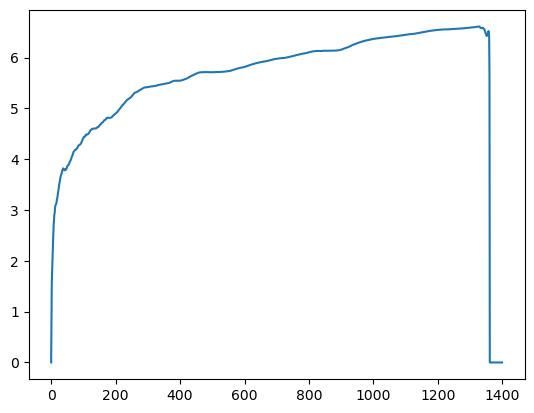

In [32]:
plt.plot(ent_pset_members)

# # Probability distributions in the Hexgrid

> Obs: We compared the trajectories of the from the moment of the release, despite the particles been released at different times. The analysis that we are performing is based in spacial variability of particle trajectories from the starting location. And we are measuring how we can increase the variability of the trajectories by doing a continous release, etc. If we compared the spacial location of the particles at the same time, despite been relaesed at different times, this will make unfair comparissons about instant position of particles in the space. This creates an unfair comparison between distributions with long release time periods over distributions with short time periods. 